**Competition and data overview:**<br/>
In this competition, we are provided with the challenge of predicting total sales for every product and store in the next month. Time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

1. Exploratory analysis of the classical time-series (EDA)

In [1]:
# import packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# import data
sales = pd.read_csv("sales_train.csv")
items = pd.read_csv("items.csv")

In [3]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [14]:
sales.shape

(2935849, 6)

In [4]:
# parse datetime
sales.date = sales.date.apply(
    lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'))
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


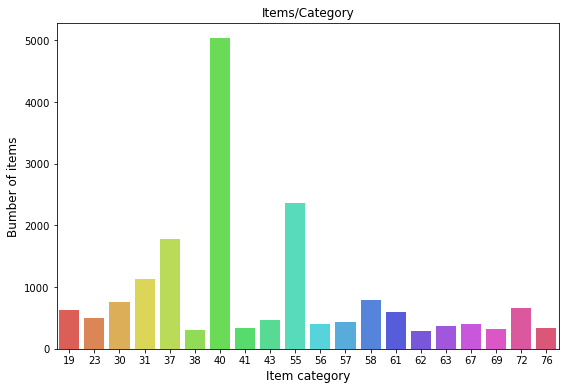

In [11]:
# how many products are in each category?
prod_per_cat = items.groupby(['item_category_id']).count()
prod_per_cat = prod_per_cat.sort_values(by='item_id', ascending=False)
prod_per_cat = prod_per_cat.iloc[0:20].reset_index()

plt.figure(figsize=(9, 6))

sns.barplot(x='item_category_id', y='item_id', data=prod_per_cat,
            palette='hls',
            capsize=0.05,
            saturation=8,
            errcolor='gray', errwidth=2,
            ci='sd'
            )

plt.title("Items/Category")
plt.ylabel('Number of items', fontsize=12)
plt.xlabel('Item category', fontsize=12)
plt.show()

Text(0, 0.5, 'Sales')

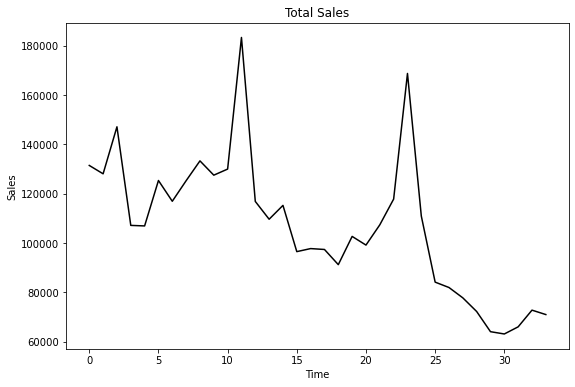

In [17]:
# total sales for one month
tot_amount = sales.groupby(["date_block_num"])["item_cnt_day"].sum().map(float)

plt.figure(figsize=(9,6))
plt.plot(tot_amount, color='black')
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')